# Create Dataset

## Create basic Params
Creating the basic dataset attributes.

In [1]:
folder_name = 'ikea_drill_screw'
TRAIN_COUNT = 800
VAL_COUNT = 200
IMAGE_SIZE = 512
INPUT_PATH = '../datasets/{}/input'.format(folder_name)
VAL_PATH = '../datasets/{}/val'.format(folder_name)
TRAIN_PATH = '../datasets/{}/train'.format(folder_name)
DI_PATH = INPUT_PATH + '/dataset_info.json'

## Create Training Set

In [2]:
MASK_DEF_PATH = TRAIN_PATH + '/mask_definitions.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {TRAIN_PATH} --count {TRAIN_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}

../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Create Validation Set

In [3]:
MASK_DEF_PATH = VAL_PATH + '/mask_definitions.json'
DI_PATH = INPUT_PATH + '/dataset_info.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {VAL_PATH} --count {VAL_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}


../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Preview the generated datasets

In [4]:
import os
import sys
import numpy as np
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from src import coco_trainer
from mrcnn import visualize


dataset_train = coco_trainer.CocoLikeDataset()
dataset_train.load_data(TRAIN_PATH+'/coco_instances.json',TRAIN_PATH+'/images')
dataset_train.prepare()

dataset_val = coco_trainer.CocoLikeDataset()
dataset_val.load_data(VAL_PATH+'/coco_instances.json',VAL_PATH+'/images')
dataset_val.prepare()

Using TensorFlow backend.


Displaying examples from training dataset:


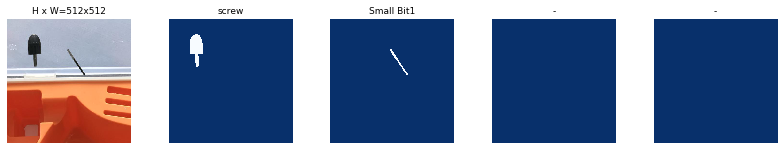

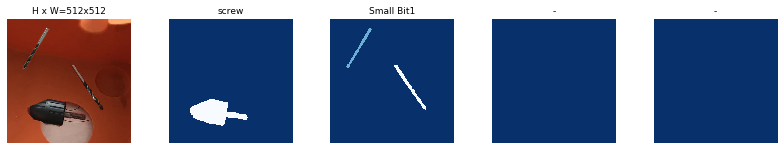

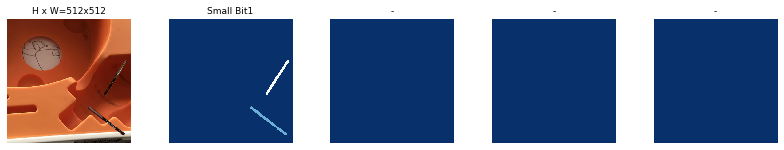

Displaying examples from validation dataset:


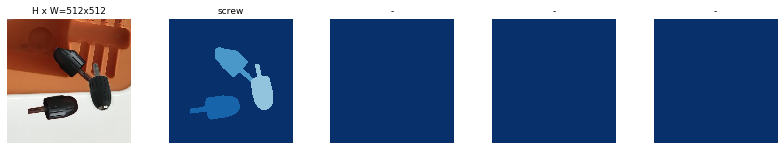

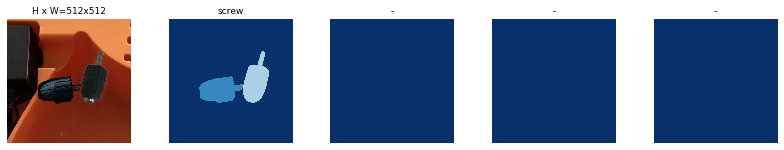

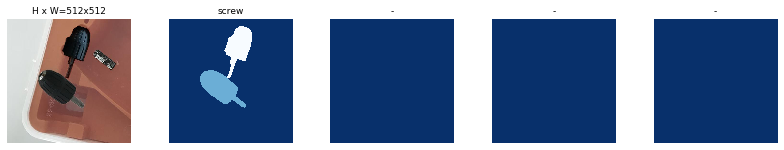

In [5]:
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Sync to S3

In [6]:
!aws s3 sync ../datasets s3://dkitdatasets --delete

upload: ../datasets/ikea_drill_screw/.DS_Store to s3://dkitdatasets/ikea_drill_screw/.DS_Store
upload: ../datasets/ikea_drill_screw/train/images/00000005.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000005.jpg
delete: s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/Bit 8/Image 10.png
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
upload: ../datasets/ikea_drill_screw/train/images/00000003.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000003.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000002.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000002.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000001.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000001.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000000.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000000.jpg
upload: ../datasets/ike

upload: ../datasets/ikea_drill_screw/train/images/00000027.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000027.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000063.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000063.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000066.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000066.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000065.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000065.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000069.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000069.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000067.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000067.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000064.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000064.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000068.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000132.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000132.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000130.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000130.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000133.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000133.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000129.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000129.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000137.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000137.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000136.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000136.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000135.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000135.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000131.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000195.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000195.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000197.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000197.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000196.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000196.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000191.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000191.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000200.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000200.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000198.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000198.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000188.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000188.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000199.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000265.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000265.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000264.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000264.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000259.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000259.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000272.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000272.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000274.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000274.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000269.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000269.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000270.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000270.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000271.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000333.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000333.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000338.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000338.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000334.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000334.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000335.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000335.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000340.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000340.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000339.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000339.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000336.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000336.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000337.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000407.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000407.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000406.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000406.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000398.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000398.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000411.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000411.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000408.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000408.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000410.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000410.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000409.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000409.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000415.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000469.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000469.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000473.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000473.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000474.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000474.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000461.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000461.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000465.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000465.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000471.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000471.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000475.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000475.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000476.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000535.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000535.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000539.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000539.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000537.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000537.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000538.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000538.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000531.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000531.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000536.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000536.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000540.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000540.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000541.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000600.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000600.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000603.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000603.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000601.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000601.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000602.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000602.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000606.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000606.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000605.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000605.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000607.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000607.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000608.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000671.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000671.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000670.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000670.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000674.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000674.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000676.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000676.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000672.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000672.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000675.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000675.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000652.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000652.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000678.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000743.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000743.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000744.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000744.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000745.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000745.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000740.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000740.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000746.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000746.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000738.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000738.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000747.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000747.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000748.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/masks/00000000.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000000.png
upload: ../datasets/ikea_drill_screw/train/masks/00000006.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000006.png
upload: ../datasets/ikea_drill_screw/train/masks/00000005.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000005.png
upload: ../datasets/ikea_drill_screw/train/masks/00000007.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000007.png
upload: ../datasets/ikea_drill_screw/train/masks/00000009.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000009.png
upload: ../datasets/ikea_drill_screw/train/masks/00000010.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000010.png
upload: ../datasets/ikea_drill_screw/train/masks/00000008.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000008.png
upload: ../datasets/ikea_drill_screw/train/masks/00000011.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000011.png


upload: ../datasets/ikea_drill_screw/train/masks/00000069.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000069.png
upload: ../datasets/ikea_drill_screw/train/masks/00000070.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000070.png
upload: ../datasets/ikea_drill_screw/train/masks/00000066.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000066.png
upload: ../datasets/ikea_drill_screw/train/masks/00000071.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000071.png
upload: ../datasets/ikea_drill_screw/train/masks/00000067.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000067.png
upload: ../datasets/ikea_drill_screw/train/masks/00000072.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000072.png
upload: ../datasets/ikea_drill_screw/train/masks/00000073.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000073.png
upload: ../datasets/ikea_drill_screw/train/masks/00000075.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000075.png


upload: ../datasets/ikea_drill_screw/train/masks/00000133.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000133.png
upload: ../datasets/ikea_drill_screw/train/masks/00000140.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000140.png
upload: ../datasets/ikea_drill_screw/train/masks/00000122.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000122.png
upload: ../datasets/ikea_drill_screw/train/masks/00000138.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000138.png
upload: ../datasets/ikea_drill_screw/train/masks/00000139.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000139.png
upload: ../datasets/ikea_drill_screw/train/masks/00000141.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000141.png
upload: ../datasets/ikea_drill_screw/train/masks/00000142.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000142.png
upload: ../datasets/ikea_drill_screw/train/masks/00000114.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000114.png


upload: ../datasets/ikea_drill_screw/train/masks/00000204.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000204.png
upload: ../datasets/ikea_drill_screw/train/masks/00000201.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000201.png
upload: ../datasets/ikea_drill_screw/train/masks/00000207.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000207.png
upload: ../datasets/ikea_drill_screw/train/masks/00000206.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000206.png
upload: ../datasets/ikea_drill_screw/train/masks/00000203.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000203.png
upload: ../datasets/ikea_drill_screw/train/masks/00000209.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000209.png
upload: ../datasets/ikea_drill_screw/train/masks/00000208.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000208.png
upload: ../datasets/ikea_drill_screw/train/masks/00000210.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000210.png


upload: ../datasets/ikea_drill_screw/train/masks/00000276.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000276.png
upload: ../datasets/ikea_drill_screw/train/masks/00000275.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000275.png
upload: ../datasets/ikea_drill_screw/train/masks/00000277.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000277.png
upload: ../datasets/ikea_drill_screw/train/masks/00000273.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000273.png
upload: ../datasets/ikea_drill_screw/train/masks/00000274.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000274.png
upload: ../datasets/ikea_drill_screw/train/masks/00000272.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000272.png
upload: ../datasets/ikea_drill_screw/train/masks/00000281.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000281.png
upload: ../datasets/ikea_drill_screw/train/masks/00000278.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000278.png


upload: ../datasets/ikea_drill_screw/train/masks/00000337.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000337.png
upload: ../datasets/ikea_drill_screw/train/masks/00000342.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000342.png
upload: ../datasets/ikea_drill_screw/train/masks/00000334.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000334.png
upload: ../datasets/ikea_drill_screw/train/masks/00000346.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000346.png
upload: ../datasets/ikea_drill_screw/train/masks/00000335.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000335.png
upload: ../datasets/ikea_drill_screw/train/masks/00000345.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000345.png
upload: ../datasets/ikea_drill_screw/train/masks/00000340.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000340.png
upload: ../datasets/ikea_drill_screw/train/masks/00000347.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000347.png


upload: ../datasets/ikea_drill_screw/train/masks/00000407.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000407.png
upload: ../datasets/ikea_drill_screw/train/masks/00000406.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000406.png
upload: ../datasets/ikea_drill_screw/train/masks/00000411.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000411.png
upload: ../datasets/ikea_drill_screw/train/masks/00000409.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000409.png
upload: ../datasets/ikea_drill_screw/train/masks/00000417.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000417.png
upload: ../datasets/ikea_drill_screw/train/masks/00000414.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000414.png
upload: ../datasets/ikea_drill_screw/train/masks/00000413.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000413.png
upload: ../datasets/ikea_drill_screw/train/masks/00000419.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000419.png


upload: ../datasets/ikea_drill_screw/train/masks/00000477.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000477.png
upload: ../datasets/ikea_drill_screw/train/masks/00000476.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000476.png
upload: ../datasets/ikea_drill_screw/train/masks/00000473.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000473.png
upload: ../datasets/ikea_drill_screw/train/masks/00000478.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000478.png
upload: ../datasets/ikea_drill_screw/train/masks/00000480.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000480.png
upload: ../datasets/ikea_drill_screw/train/masks/00000479.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000479.png
upload: ../datasets/ikea_drill_screw/train/masks/00000483.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000483.png
upload: ../datasets/ikea_drill_screw/train/masks/00000485.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000485.png


upload: ../datasets/ikea_drill_screw/train/masks/00000550.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000550.png
upload: ../datasets/ikea_drill_screw/train/masks/00000547.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000547.png
upload: ../datasets/ikea_drill_screw/train/masks/00000556.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000556.png
upload: ../datasets/ikea_drill_screw/train/masks/00000553.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000553.png
upload: ../datasets/ikea_drill_screw/train/masks/00000552.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000552.png
upload: ../datasets/ikea_drill_screw/train/masks/00000555.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000555.png
upload: ../datasets/ikea_drill_screw/train/masks/00000557.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000557.png
upload: ../datasets/ikea_drill_screw/train/masks/00000559.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000559.png


upload: ../datasets/ikea_drill_screw/train/masks/00000618.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000618.png
upload: ../datasets/ikea_drill_screw/train/masks/00000620.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000620.png
upload: ../datasets/ikea_drill_screw/train/masks/00000619.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000619.png
upload: ../datasets/ikea_drill_screw/train/masks/00000626.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000626.png
upload: ../datasets/ikea_drill_screw/train/masks/00000625.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000625.png
upload: ../datasets/ikea_drill_screw/train/masks/00000623.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000623.png
upload: ../datasets/ikea_drill_screw/train/masks/00000628.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000628.png
upload: ../datasets/ikea_drill_screw/train/masks/00000630.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000630.png


upload: ../datasets/ikea_drill_screw/train/masks/00000697.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000697.png
upload: ../datasets/ikea_drill_screw/train/masks/00000701.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000701.png
upload: ../datasets/ikea_drill_screw/train/masks/00000696.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000696.png
upload: ../datasets/ikea_drill_screw/train/masks/00000699.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000699.png
upload: ../datasets/ikea_drill_screw/train/masks/00000703.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000703.png
upload: ../datasets/ikea_drill_screw/train/masks/00000698.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000698.png
upload: ../datasets/ikea_drill_screw/train/masks/00000702.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000702.png
upload: ../datasets/ikea_drill_screw/train/masks/00000704.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000704.png


upload: ../datasets/ikea_drill_screw/train/masks/00000767.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000767.png
upload: ../datasets/ikea_drill_screw/train/masks/00000764.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000764.png
upload: ../datasets/ikea_drill_screw/train/masks/00000762.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000762.png
upload: ../datasets/ikea_drill_screw/train/masks/00000772.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000772.png
upload: ../datasets/ikea_drill_screw/train/masks/00000771.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000771.png
upload: ../datasets/ikea_drill_screw/train/masks/00000769.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000769.png
upload: ../datasets/ikea_drill_screw/train/masks/00000766.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000766.png
upload: ../datasets/ikea_drill_screw/train/masks/00000768.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000768.png


upload: ../datasets/ikea_drill_screw/val/images/00000039.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000039.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000033.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000033.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000040.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000040.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000028.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000028.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000036.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000036.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000042.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000042.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000041.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000041.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000045.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000045.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000106.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000106.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000108.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000108.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000107.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000107.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000111.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000111.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000109.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000109.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000113.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000113.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000110.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000110.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000092.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000092.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000175.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000175.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000180.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000180.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000173.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000173.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000174.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000174.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000179.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000179.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000176.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000176.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000181.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000181.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000185.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000185.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/masks/00000041.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000041.png
upload: ../datasets/ikea_drill_screw/val/masks/00000040.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000040.png
upload: ../datasets/ikea_drill_screw/val/masks/00000042.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000042.png
upload: ../datasets/ikea_drill_screw/val/masks/00000047.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000047.png
upload: ../datasets/ikea_drill_screw/val/masks/00000049.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000049.png
upload: ../datasets/ikea_drill_screw/val/masks/00000045.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000045.png
upload: ../datasets/ikea_drill_screw/val/masks/00000036.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000036.png
upload: ../datasets/ikea_drill_screw/val/masks/00000038.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000038.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000116.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000116.png
upload: ../datasets/ikea_drill_screw/val/masks/00000120.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000120.png
upload: ../datasets/ikea_drill_screw/val/masks/00000122.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000122.png
upload: ../datasets/ikea_drill_screw/val/masks/00000119.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000119.png
upload: ../datasets/ikea_drill_screw/val/masks/00000121.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000121.png
upload: ../datasets/ikea_drill_screw/val/masks/00000126.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000126.png
upload: ../datasets/ikea_drill_screw/val/masks/00000123.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000123.png
upload: ../datasets/ikea_drill_screw/val/masks/00000125.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000125.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000188.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000188.png
upload: ../datasets/ikea_drill_screw/val/masks/00000190.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000190.png
upload: ../datasets/ikea_drill_screw/val/masks/00000187.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000187.png
upload: ../datasets/ikea_drill_screw/val/masks/00000186.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000186.png
upload: ../datasets/ikea_drill_screw/val/masks/00000192.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000192.png
upload: ../datasets/ikea_drill_screw/val/masks/00000199.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000199.png
upload: ../datasets/ikea_drill_screw/val/masks/00000198.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000198.png
upload: ../datasets/ikea_drill_screw/val/masks/00000196.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000196.png
upload: ../datasets/ikea_drill_s

# Check if training works locally

In [7]:
# !python3 ../src/coco_trainer.py train --dataset=../datasets/ikea_drill_screw --weights=coco --layers2train=heads

Using TensorFlow backend.
Weights:  coco
Dataset:  ../datasets/ikea_drill_screw
Logs:  ../logs
Training:  heads

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss'

Epoch 1/30
OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
OMP: Hint: This means that multiple copies of the OpenMP runtime have been linked into the program. That is dangerous, since it can degrade performance or cause incorrect results. The best thing to do is to ensure that only a single OpenMP runtime is linked into the process, e.g. by avoiding static linking of the OpenMP runtime in any library. As an unsafe, unsupported, undocumented workaround you can set the environment variable KMP_DUPLICATE_LIB_OK=TRUE to allow the program to continue to execute, but that may cause crashes or silently produce incorrect results. For more information, please see http://www.intel.com/software/products/support/.


# Train Model in AWS

In [8]:
!bash ../src/scripts/start-training.sh all

bash: start-training.sh: No such file or directory
